In [5]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Import citipy module.
import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [10]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734c66e71b6a0a01011706587c11aee5


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | hualmay
Processing Record 5 of Set 1 | staunton
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | alugan
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | graham
Processing Record 18 of Set 1 | blyth
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | amapa
Processing Record 22 of Set 1 | lavrentiya
Processing Record 23 of Set 1 | nizhneyansk
City no

Processing Record 35 of Set 4 | cikupa
Processing Record 36 of Set 4 | kamenka
Processing Record 37 of Set 4 | rio brilhante
Processing Record 38 of Set 4 | plettenberg bay
Processing Record 39 of Set 4 | casa grande
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | pandan
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | uglich
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | cairns
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | yanchukan
City not found. Skipping...
Processing Record 1 of Set 5 | ta khmau
Processing Record 2 of Set 5 | rabo de peixe
Processing Record 3 of Set 5 | vylgort
City not found. Skipping...
Processing Record 4 of Set 5 | bam
Processing Record 5 of Set 5 | zyryanka
Processing Record 6 of Set 5 | porto walter
Processing Record 7 of Set 5 | capinza

Processing Record 27 of Set 8 | acarau
Processing Record 28 of Set 8 | erzin
Processing Record 29 of Set 8 | sandavagur
City not found. Skipping...
Processing Record 30 of Set 8 | ixtapa
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | wrzesnia
Processing Record 34 of Set 8 | sitka
Processing Record 35 of Set 8 | yazman
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | honningsvag
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | mahon
Processing Record 40 of Set 8 | mehamn
Processing Record 41 of Set 8 | carutapera
Processing Record 42 of Set 8 | kapchorwa
Processing Record 43 of Set 8 | saltillo
Processing Record 44 of Set 8 | taganak
Processing Record 45 of Set 8 | jackson
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | anadyr
Processing Record 48 of Set 8 | malwan
City not found. Skipping...
Processing Record 49 of Set 8 | dunda
Processing Record 50 of

Processing Record 10 of Set 12 | cascais
Processing Record 11 of Set 12 | rayong
Processing Record 12 of Set 12 | kloulklubed
Processing Record 13 of Set 12 | aden
Processing Record 14 of Set 12 | moose factory
Processing Record 15 of Set 12 | devarkonda
Processing Record 16 of Set 12 | itacoatiara
Processing Record 17 of Set 12 | bafata
Processing Record 18 of Set 12 | puerto carreno
Processing Record 19 of Set 12 | kawalu
Processing Record 20 of Set 12 | kethely
Processing Record 21 of Set 12 | soligalich
Processing Record 22 of Set 12 | riaba
City not found. Skipping...
Processing Record 23 of Set 12 | soyo
Processing Record 24 of Set 12 | sao joao da barra
Processing Record 25 of Set 12 | kruisfontein
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | kavieng
Processing Record 28 of Set 12 | tarudant
City not found. Skipping...
Processing Record 29 of Set 12 | dwarka
Processing Record 30 of Set 12 | ukiah
Processing Record 31 of Set 12 | pedregal
Processing R

In [14]:
len(city_data)

550

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,10.92,89,100,13.09,RU,2021-04-18 03:15:29
1,Rikitea,-23.1203,-134.9692,77.34,68,43,3.65,PF,2021-04-18 03:15:30
2,Talnakh,69.4865,88.3972,-10.05,88,38,2.33,RU,2021-04-18 03:15:30
3,Hualmay,-11.0964,-77.6139,67.46,88,75,6.33,PE,2021-04-18 03:15:30
4,Staunton,38.1496,-79.0717,50.00,66,90,4.61,US,2021-04-18 03:12:16
5,Tiksi,71.6872,128.8694,9.84,80,100,7.09,RU,2021-04-18 03:15:31
6,Te Anau,-45.4167,167.7167,56.43,72,84,8.12,NZ,2021-04-18 03:15:31
7,Ushuaia,-54.8000,-68.3000,51.80,58,40,8.05,AR,2021-04-18 03:15:32
8,Vaini,-21.2000,-175.2000,78.80,69,40,3.44,TO,2021-04-18 03:15:32
9,Dikson,73.5069,80.5464,-6.03,96,50,3.85,RU,2021-04-18 03:15:33


In [16]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, 
# and Wind Speed, so they are easy to read.

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng',
                   'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-04-18 03:15:29,71.9167,114.0833,10.92,89,100,13.09
1,Rikitea,PF,2021-04-18 03:15:30,-23.1203,-134.9692,77.34,68,43,3.65
2,Talnakh,RU,2021-04-18 03:15:30,69.4865,88.3972,-10.05,88,38,2.33
3,Hualmay,PE,2021-04-18 03:15:30,-11.0964,-77.6139,67.46,88,75,6.33
4,Staunton,US,2021-04-18 03:12:16,38.1496,-79.0717,50.00,66,90,4.61
5,Tiksi,RU,2021-04-18 03:15:31,71.6872,128.8694,9.84,80,100,7.09
6,Te Anau,NZ,2021-04-18 03:15:31,-45.4167,167.7167,56.43,72,84,8.12
7,Ushuaia,AR,2021-04-18 03:15:32,-54.8000,-68.3000,51.80,58,40,8.05
8,Vaini,TO,2021-04-18 03:15:32,-21.2000,-175.2000,78.80,69,40,3.44
9,Dikson,RU,2021-04-18 03:15:33,73.5069,80.5464,-6.03,96,50,3.85


In [17]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

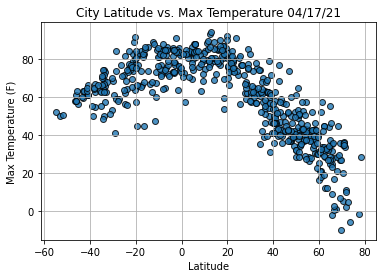

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

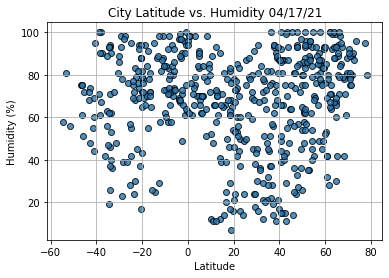

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

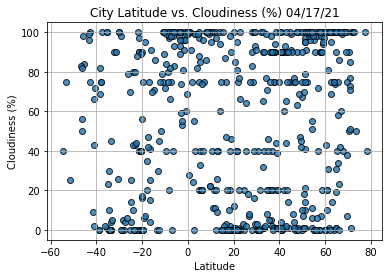

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

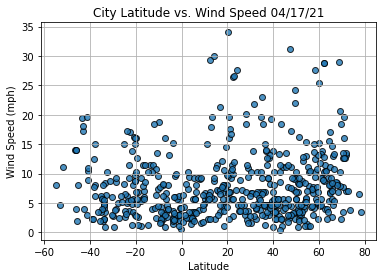

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()